In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import sys
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import math

In [2]:
# Read input data
inputData = pd.read_csv("Dataset 1.txt", sep='\t', lineterminator='\n', header=None)

In [3]:
# Divide data and ground truth clusters
data = inputData[inputData.columns[2:]]
groundTruthClusters = inputData[inputData.columns[1:2]]
inputData = np.array(inputData)
numberOfClusters = 5

In [4]:
##################################################################################
# Function to perform hierarchical clustering with single linkage(Min approach)
##################################################################################
def HAC(numberOfClusters,distanceMatrix,inputData,clusterLabelList):
    
    dataCount = len(inputData)
    counter=-1

    while counter!=(dataCount-numberOfClusters-1):
        
        counter=0
        val = clusterLabelList.count('NULL')
        counter += val
      
        minimum=(distanceMatrix[distanceMatrix>0]).min()
        min_index=np.where(distanceMatrix==minimum)[-1]
        x=min_index[-2]
        y=min_index[-1]
        for i in range(0,dataCount):
        # Recompute distance matrix after combining clusters
            distanceMatrix[x][i]=min(distanceMatrix[x][i],distanceMatrix[y][i])
            distanceMatrix[y][i]= 0     # diagonally mirrored hence redundant value
            distanceMatrix[i][x]=min(distanceMatrix[i][x],distanceMatrix[i][y])
            distanceMatrix[i][y]= 0
    
        #combine clusters in map and delete old entry
        clusterLabelList[x]=clusterLabelList[x]+','+(clusterLabelList[y])
        clusterLabelList[y]="NULL"
       
    ctr=0
    clusters=[]

    for i in range(numberOfClusters):
        clusters.append([])
    for i in range(dataCount):
        if clusterLabelList[i]!='NULL':
            clusters[ctr].append(clusterLabelList[i])
            ctr+=1

    finalclusters=[]
    for i in range(len(clusters)):
        finalclusters.append([])
    
    for i in range(len(clusters)):    
        cluster_set=clusters[i]
        temp=[]
        for clust in cluster_set:
            for pt in clust.split(','):
                temp.append(int(pt))
        finalclusters[i]=temp  
        
    clusters=[0]*dataCount
    clustername=1
    
    for labels in finalclusters:
        for l in labels:
            clusters[l-1]=clustername
        clustername+=1
        
    return clusters

In [5]:
# List of clusetring labels
clusterLabelList = []
for i in range (len(data)):
    clusterLabelList.append(str(i+1))

In [6]:
# Calculate the distance matrix
distanceMatrix = distance_matrix(data,data)

In [7]:
clusters=HAC(numberOfClusters,distanceMatrix,inputData,clusterLabelList)

In [8]:
#######################################################################
# Function to compute and plot PCA
#######################################################################
def plotPCA(data,labels):
    pca = PCA(n_components=2)
    data = np.matrix(data.T)
    pca.fit(data)
    pcaComponents = pca.components_
    plt.figure(figsize=(8,8))
    pc1 = pcaComponents[0,]
    pc2 = pcaComponents[1,]
    setOfLabels = list(set(labels))
    colours = []
    for i in range(len(setOfLabels)):
        colours.append(plt.cm.jet(float(i)/max(setOfLabels)))
    for i, j in enumerate(setOfLabels):    
        x = []
        y = []
        for p in range(len(pc1)):
            if labels[p] == j:
                x.append(pc1[p])
        for q in range(len(pc1)):
            if labels[q] == j:
                y.append(pc2[q])
        plt.scatter(x, y, c=colours[i], label=str(j))  
    plt.legend()
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

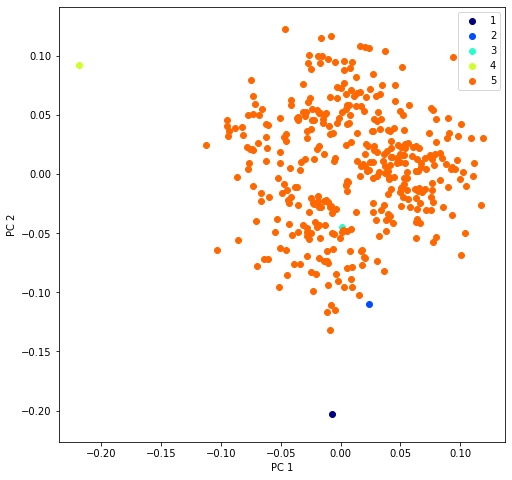

In [9]:
plotPCA(data.values,clusters)

In [10]:
#######################################################################
# Function to compute Jaccard coefficient and Rand index
#######################################################################
def metric(data,groundTruthClusters,output):
    m11=0
    m10=0
    m01=0
    m00=0
    
    for i in range(0,len(data)):
        for j in range(1,len(data)):
            if((groundTruthClusters.to_numpy())[i] == (groundTruthClusters.to_numpy())[j] and output[i] == output[j]):
                m11=m11+1
            elif((groundTruthClusters.to_numpy())[i] == (groundTruthClusters.to_numpy())[j] and not (output[i] == output[j])):
                m10=m10+1
            elif(not((groundTruthClusters.to_numpy())[i] == (groundTruthClusters.to_numpy())[j]) and output[i] == output[j]):
                m01=m01+1
            elif(not((groundTruthClusters.to_numpy())[i] == (groundTruthClusters.to_numpy())[j]) and not(output[i] == output[j])):
                m00=m00+1

    jacard_coeff=float(m11)/float((m11+m01+m10))
    print("jaccard_coefficient: ", jacard_coeff)
    rand_index=float((m11+m00))/float((m11+m00+m10+m01))
    print("rand_index: ", rand_index)

In [11]:
# Compute Jaccard coefficient and Rand index
metric(data,groundTruthClusters,clusters)

jaccard_coefficient:  0.22854174782495779
rand_index:  0.24043469483883992
